### Importing the dependencies


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

### DATA COLLECTION AND PROCESSING

In [3]:
# loading the dataset to panda Dataframe

Loan_dataset = pd.read_csv("E:\\LOAN PREDICTION SYSTEM\\archive\\loandata.csv")

In [4]:
type(Loan_dataset)

pandas.core.frame.DataFrame

In [8]:
## printing the first 5 rows of the dataset
Loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# print the number of rows and columns 

Loan_dataset.shape

(614, 13)

In [10]:
# statistical measures 
Loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# number of missing valuesin each columns 

Loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# dropping alll the missing values

Loan_dataset = Loan_dataset.dropna()

In [14]:
# After dropping the misiiong values lets check if there is any missing values

Loan_dataset.isnull().sum()
 # we got the answer we cleaned the missing values.
    

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label encoding 
in the loan_Status column we have answer in character such as (Y,N) so to replace Y,N by 0 and 1 we use this function 





In [15]:
Loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
Loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
# Dependent column values 
Loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
# Replacing the values of 3+ to 4 

Loan_dataset= Loan_dataset.replace(to_replace='3+',value=4)

In [19]:
# dependent values 

Loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [38]:
# coverting categorical columns to numerical values

Loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [39]:
Loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### DATA VISUALIZATION 

In [21]:
# EDUCATION AND THE LOAN STATUS

<AxesSubplot:xlabel='Education', ylabel='count'>

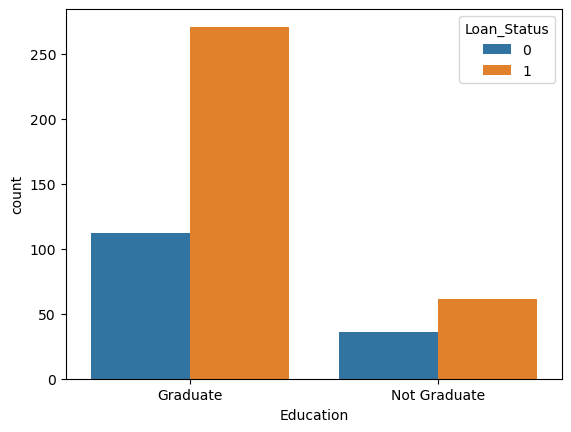

In [22]:
sns.countplot(x='Education',hue='Loan_Status',data=Loan_dataset)

In [23]:
# MATRITAL STATUS AND LOAN STATUS 

<AxesSubplot:xlabel='Married', ylabel='count'>

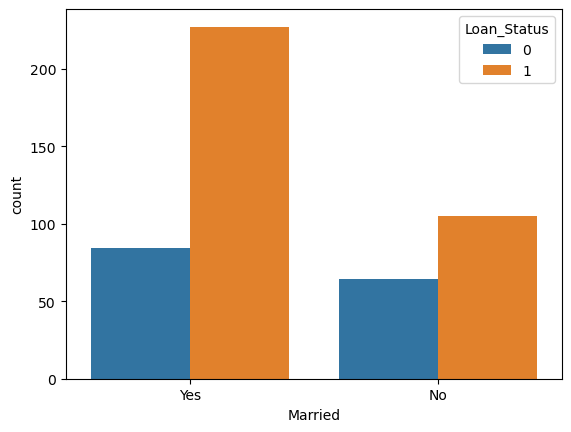

In [24]:
sns.countplot(x='Married',hue='Loan_Status',data=Loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

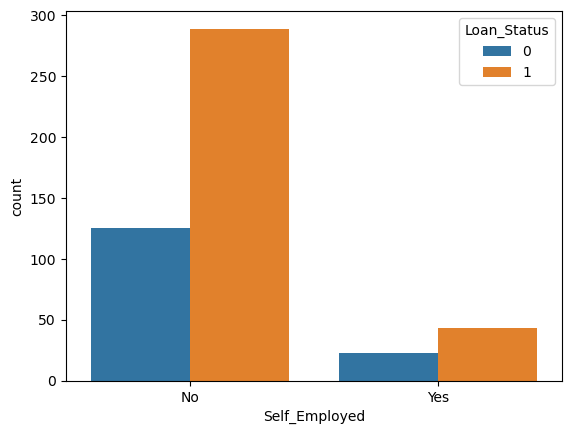

In [28]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=Loan_dataset)


<AxesSubplot:xlabel='Gender', ylabel='count'>

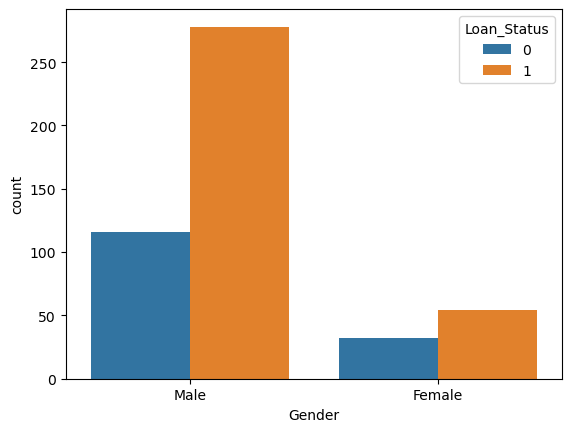

In [31]:
sns.countplot(x='Gender',hue = 'Loan_Status', data=Loan_dataset)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

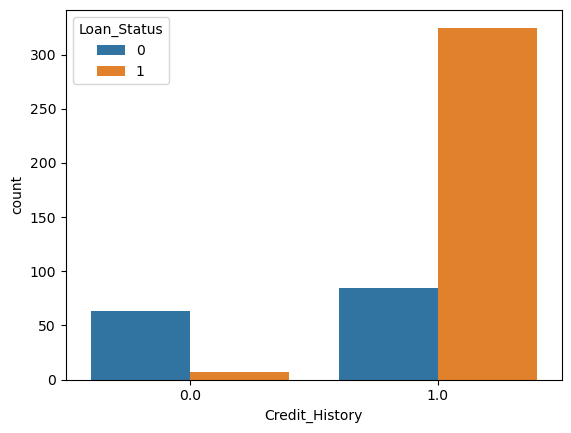

In [32]:
sns.countplot(x='Credit_History',hue='Loan_Status', data = Loan_dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

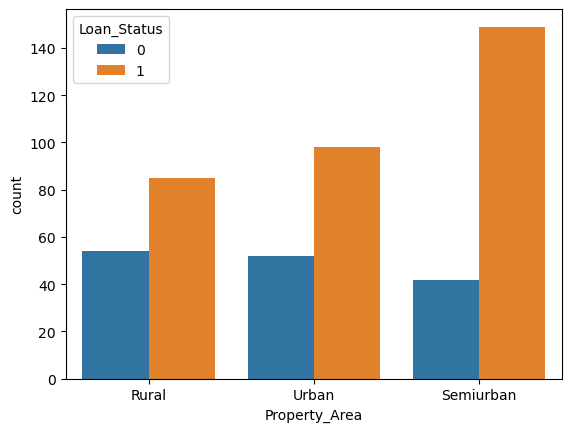

In [36]:
sns.countplot(x='Property_Area',hue='Loan_Status', data=Loan_dataset)

In [42]:
 # Seperating the data and label 

X = Loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1) 
# if we want to remove column we use 1 , if wanted to remove row then we use 0
Y= Loan_dataset['Loan_Status']

In [43]:
print(X)
print (Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [44]:
# SPLITING THE DATA INTO TRAIN AND TEST



### Train Test_Split

In [49]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
# x reprenst data and y represent columns
# 0.1 REPRESENTS 10 PERCENATGE OF DATA STORED IN TEST DATA AND 90% STORED IN X

In [50]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


### Traning the model by SUPPORT VECTOR MACHINE MODEL

In [51]:
classifier = svm.SVC(kernel='linear')

## Training the support vector machine model


In [53]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## MODEL EVALUATION

In [54]:
# ACCURACY SCORE ON TRAIN DATA 
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [55]:
print ('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7986111111111112


In [57]:
# ACCURACY SCORE ON Test DATA 
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [58]:
print ('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8333333333333334
